In [1]:
import json
import pandas as pd
from IPython.display import display, HTML

def sub_v(a,b):
	return [a[0] - b[0], a[1] - b[1], a[2] - b[2]]


data = {}
with open("/home/user/projects/shadow_robot/base/src/in_hand_pose_estimation/sr_tactile_perception/data/vel_20230508_094636.json") as f:
	data = json.load(f)



dt = 0.1 # s

df = pd.DataFrame({
	"finger": " ", 
	"t"     : [],
	"px"    : [], 
	"py"    : [], 
	"pz"    : [], 
	"fx"    : [], 
	"fy"    : [], 
	"fz"    : [], 
	"nx"    : [], 
	"ny"    : [], 
	"nz"    : [], 
	"taux"  : [], 
	"tauy"  : [], 
	"tauz"  : [], 
	"vx"    : [], 
	"vy"    : [], 
	"vz"    : [] 
})

j = 0

prev_pos = [0,0,0]

for key1, value1 in data.items():
	# print(f"{key1=} | {value1=}")
	# print(j, key1)
	# j += 1
	for fn, contact_data in value1.items():
		# print(f"{fn=} | {contact_data=}")
		for n_f_t_p, vec_n in contact_data.items():
   
			nc = vec_n if n_f_t_p == "nc" else 0
			if nc == 0: continue
			
			for i in range(nc):
				# print(f"{nc=}")
				# print(f"{key1=}")
				n = contact_data["normals"][f"n{i}"]
				# print(contact_data["contact_points"])
				p = contact_data["contact_points"][f"contact_point{i}"]
				f = contact_data["forces"][f"f{i}"]
				tau = contact_data["torques"][f"tau{i}"]

				new_pos = p
				dp = sub_v(new_pos,prev_pos)
				prev_pos = new_pos
				v = [ dpi / dt for dpi in dp]
				
				new_row = {
					"finger": fn.split("_")[1], 
					"t" : key1[1:],
					"px": p[0],
					"py": p[1],
					"pz": p[2],
					"fx": f[0], 
					"fy": f[1], 
					"fz": f[2], 
					"nx": n[0], 
					"ny": n[1], 
					"nz": n[2],
					"taux": tau[0], 
					"tauy": tau[1], 
					"tauz": tau[2],
					"vx" : v[0],
					"vy" : v[1],
					"vz" : v[2],
				}
				# print(f"{new_row=}")
				df.loc[len(df)] = new_row
			break

display(df)
# display(HTML(df.to_html()))




,finger,t,px,py,pz,fx,fy,fz,nx,ny,nz,taux,tauy,tauz,vx,vy,vz
0,FF,0,0.095714,-0.331485,1.033405,0.000000e+00,-1.000000e+00,0.000000e+00,0.0,-1.0,0.0,0.000000e+00,-1.000000e+00,0.000000e+00,0.957142,-3.314850,1.033405e+01
1,FF,0,0.095718,-0.331485,1.033398,0.000000e+00,-1.000000e+00,0.000000e+00,0.0,-1.0,0.0,0.000000e+00,-1.000000e+00,0.000000e+00,0.000033,0.000000,-7.010282e-05
2,FF,0,0.095714,-0.331485,1.033396,0.000000e+00,-1.000000e+00,0.000000e+00,0.0,-1.0,0.0,0.000000e+00,-1.000000e+00,0.000000e+00,-0.000033,0.000003,-2.023369e-05
3,FF,0,0.095718,-0.331485,1.033396,0.000000e+00,-1.000000e+00,0.000000e+00,0.0,-1.0,0.0,0.000000e+00,-1.000000e+00,0.000000e+00,0.000041,-0.000003,-8.588706e-08
4,FF,0,0.095714,-0.331485,1.033391,0.000000e+00,-1.000000e+00,0.000000e+00,0.0,-1.0,0.0,0.000000e+00,-1.000000e+00,0.000000e+00,-0.000042,0.000000,-4.563327e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,LF,156,0.088274,-0.331482,0.957840,2.272695e-174,2.214493e-174,1.845386e-174,0.0,-1.0,0.0,-4.402848e-176,2.303680e-176,2.657898e-176,-0.000185,0.000030,-2.531316e-07
5789,LF,156,0.088301,-0.331485,0.958847,-3.689562e-02,3.706284e-02,-4.340012e-02,0.0,-1.0,0.0,2.118500e-04,-3.454718e-04,-4.751254e-04,0.000270,-0.000030,1.007666e-02
5790,LF,156,0.086892,-0.331485,0.959980,-5.091533e-01,1.145017e+00,-1.393913e+00,0.0,-1.0,0.0,9.154983e-03,-2.564961e-03,-5.450995e-03,-0.014090,0.000000,1.132080e-02
5791,LF,156,0.087181,-0.331485,0.959849,0.000000e+00,0.000000e+00,0.000000e+00,0.0,-1.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.002885,0.000000,-1.303602e-03


In [5]:


# compute centroid of contact points for each time step -> consistent position
# compute linear velocity with dt
# plot linear velocity, normals and contact points for one finger as they move across surface

# mf_df = df[df["finger"] == "FF"]
# display(mf_df)
display(df)

file_name = "vel_data.csv"

df.to_csv("/home/user/projects/shadow_robot/base/src/in_hand_pose_estimation/sr_tactile_perception/scripts/save_data/vel_data/" + file_name)



,finger,t,px,py,pz,fx,fy,fz,nx,ny,nz,taux,tauy,tauz,vx,vy,vz
0,FF,0,0.095714,-0.331485,1.033405,0.000000e+00,-1.000000e+00,0.000000e+00,0.0,-1.0,0.0,0.000000e+00,-1.000000e+00,0.000000e+00,0.957142,-3.314850,1.033405e+01
1,FF,0,0.095718,-0.331485,1.033398,0.000000e+00,-1.000000e+00,0.000000e+00,0.0,-1.0,0.0,0.000000e+00,-1.000000e+00,0.000000e+00,0.000033,0.000000,-7.010282e-05
2,FF,0,0.095714,-0.331485,1.033396,0.000000e+00,-1.000000e+00,0.000000e+00,0.0,-1.0,0.0,0.000000e+00,-1.000000e+00,0.000000e+00,-0.000033,0.000003,-2.023369e-05
3,FF,0,0.095718,-0.331485,1.033396,0.000000e+00,-1.000000e+00,0.000000e+00,0.0,-1.0,0.0,0.000000e+00,-1.000000e+00,0.000000e+00,0.000041,-0.000003,-8.588706e-08
4,FF,0,0.095714,-0.331485,1.033391,0.000000e+00,-1.000000e+00,0.000000e+00,0.0,-1.0,0.0,0.000000e+00,-1.000000e+00,0.000000e+00,-0.000042,0.000000,-4.563327e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,LF,156,0.088274,-0.331482,0.957840,2.272695e-174,2.214493e-174,1.845386e-174,0.0,-1.0,0.0,-4.402848e-176,2.303680e-176,2.657898e-176,-0.000185,0.000030,-2.531316e-07
5789,LF,156,0.088301,-0.331485,0.958847,-3.689562e-02,3.706284e-02,-4.340012e-02,0.0,-1.0,0.0,2.118500e-04,-3.454718e-04,-4.751254e-04,0.000270,-0.000030,1.007666e-02
5790,LF,156,0.086892,-0.331485,0.959980,-5.091533e-01,1.145017e+00,-1.393913e+00,0.0,-1.0,0.0,9.154983e-03,-2.564961e-03,-5.450995e-03,-0.014090,0.000000,1.132080e-02
5791,LF,156,0.087181,-0.331485,0.959849,0.000000e+00,0.000000e+00,0.000000e+00,0.0,-1.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.002885,0.000000,-1.303602e-03


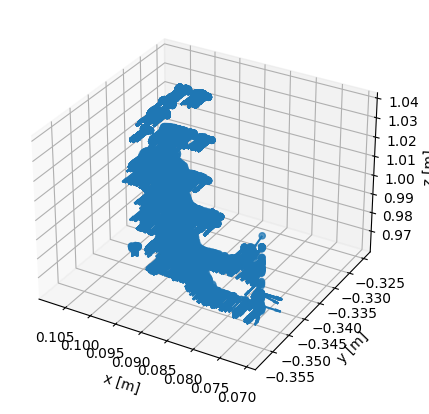

In [3]:

import matplotlib.pyplot as plt
from utils import Vector3, COLORS_RGBA, Arrow3D, l2
from pandas import DataFrame
from constants import AXIS_LIMITS, LEGEND_ANCHOR, SPACE_SCALE, X_LABEL, Y_LABEL, Z_LABEL, FLAT_TEXT, \
    EDGE_TEXT, SPHERE_TEXT, NORMALS_TEXT, VECTOR_SCALE, MARKER_SIZE, FORCES_TEXT, TORQUES_TEXT, NUMBER_OF_PLOTS, TIME_STATE_TEXT, \
    FLAT_REF_VEC, EDGE_REF_VEC, SPHERE_REF_VEC, SPHERE_CENTER, NUM_OF_HIS_BINS, CUBE_POSE
# color_code = 

# df = df[0:500]

def plot_normals(ax,df: DataFrame):
	xs = df["px"].to_list()
	ax.scatter3D(df["px"], df["py"], df["pz"])
	# ax.scatter3D(df["px"], df["py"], df["pz"], color=f.color.color_code, label=f.name_verbose, alpha=1, s=MARKER_SIZE)
	# ax.scatter3D(f.contact_points[0], f.contact_points[1], f.contact_points[2], color=f.color.color_code, label=f.name_verbose, alpha=1, s=MARKER_SIZE)
	for i in range(len(xs)):
		cp = Vector3(df["px"].to_list()[i], df["py"].to_list()[i], df["pz"].to_list()[i])
		n = Vector3(df["nx"].to_list()[i], df["ny"].to_list()[i], df["nz"].to_list()[i]).mul(VECTOR_SCALE)
		# n = Vector3(f.normals[0][i], f.normals[1][i], f.normals[2][i]).normalize().mul(VECTOR_SCALE)
		ax.quiver(cp.x, cp.y, cp.z, n.x, n.y, n.z)
		# ax.quiver(cp.x, cp.y, cp.z, n.x, n.y, n.z, color=f.color.color_code, alpha=.8, lw=1)
def plot_points():
    return
def plot_velocities():
    return


fig = plt.figure("Tactile Perception Data Presentation", figsize=(5,5))
ax = fig.add_subplot(111, projection="3d")
ax.clear()
ax.set_xlabel(X_LABEL)
ax.set_ylabel(Y_LABEL)
ax.set_zlabel(Z_LABEL)

xlim = AXIS_LIMITS["x_lim"]
ylim = AXIS_LIMITS["y_lim"]
zlim = AXIS_LIMITS["z_lim"]

ax.set_xlim(( xlim[0] + 0.005, xlim[1] - 0.015))
ax.set_ylim(( ylim[0] - 0.01, ylim[1] - 0.01 ))
ax.set_zlim(( zlim[0], zlim[1] ))

plot_normals(ax,df)







